<a href="https://colab.research.google.com/github/JaysonCosta/Exercicios_Ada/blob/main/Projeto_Finalizado_modulo_3_grupo_2(salary_datascience).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa de Verificação e Tratamento do dataset

**Este collab tem como propósito a correção de incongruências do dataset**

Anotações de problemas encontrados no datasets:
- Valores nulos encontrados nas tabelas: 
company
level
tag
gender
other details
Race
Education

- Repetição de valores encontrados na coluna "company",nomes das empresas contratantes se repetem em formas diferentes (ex: Microsoft e microsoft)

- Coluna "level" apresenta muitos resultados, acredito ser uma coluna problemática

- Em uma consulta a olho nu, percebi alguns outliers na coluna "totalyearlycompensation"

- Valores estranhos nas colunas "yearsofexperience" e "yearsatcompany", necessario estudo sobre o dataset( conferir kaggle)

- Coluna basesalary possui outliers e valores com 0

-




Correções do dataset:

Valores nulos
- company:
- level: Dropar
- tag: Dropar
- gender: alterar "Nan" para "Não informado" (tirar dúvida com professor para ver se é utilizável ou não)
- other details: Dropar
- Race: alterar "Nan" para "Não informado" (tirar dúvida com professor para ver se é utilizável ou não)
- Education: "Nan" para "Não informado" (tirar dúvida com professor para ver se é utilizável ou não)
-location: Dividir em 3 colunas (cidade, estado e páis). Depois dropar colunas não importantes

Tabelas que vão ser dropadas: (posteriormente explicar o motivo do drop)
- timestamp
- rownumber
- Masters_Degree
- Bachelors_Degree
- Doctorate_Degree
- Highschool
- Some_College
- Race_Asian
- Race_White
- Race_Two_Or_More
- Race_Black 
- Race_Hispanic   

Tabelas com correções especificas:
- Company: usar função str.title()
- basesalary: substituir os '0' pela média ou mediana ou moda dos valores sem outliers
- totalyearlycompensation: substituir os '0' pela média ou mediana ou moda dos valores sem outliers

Tabelas para análise:
- cityid
- dmaid
- yearsofexperience: Conferir os valores abaixo de 0 e ver o quantidade
- yearsatcompany: Conferir os valores abaixo de 0 e ver o quantidade

#Etapa de Verificação dos dados 

In [144]:
import pandas as pd
import numpy as np

df_salario = pd.read_csv("/content/Levels_Fyi_Salary_Data.csv", sep = ',')
df_salario.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [145]:
df_salario.shape

(62642, 29)

In [146]:
df_salario.dtypes

timestamp                   object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
cityid                       int64
dmaid                      float64
rowNumber                    int64
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race_Asian                   int64
Race_White                   int64
Race_Two_Or_More             int64
Race_Black                   int64
Race_Hispanic                int64
Race                        object
Education           

Alteração para que consigamos visuzalizar no display do colab mais linhas e colunas

In [147]:
pd.set_option('display.max_columns', 30)

In [148]:
pd.set_option('display.max_rows', 80000)

In [149]:
df_salario.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


Verificação do tamanho da base em questão com todas as linhas e colunas

In [150]:
df_salario.shape

(62642, 29)

Verificando quantos valores NA temos dentro da base em questão, foi um ponto crucial onde tivemos que decidir o que fariamos com algumas colunas, exemplo gender otherdetails e afins

In [151]:
df_salario.isnull().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

Foi verificado nas principais tabelas quantas valores diferentes tinhamos nos 62 mil registros

In [ ]:
df_salario['company'].value_counts()

In [ ]:
df_salario['level'].value_counts()

In [ ]:
df_salario['title'].value_counts()

In [ ]:
df_salario['totalyearlycompensation'].value_counts()     

In [ ]:
df_salario['location'].value_counts()     

In [ ]:
df_salario['yearsofexperience'].value_counts()     

In [ ]:
df_salario['yearsatcompany'].value_counts()  

In [ ]:
df_salario['tag'].value_counts()  

In [ ]:
df_salario['basesalary'].value_counts()  

In [ ]:
df_salario['Race'].value_counts()  

In [ ]:
df_salario['Education'].value_counts()  

In [ ]:
df_salario['gender'].value_counts()  

In [ ]:
df_salario['otherdetails'].value_counts()  

In [ ]:
df_salario['cityid'].unique()

Copiando o data set original para fazer alterações sem fazer a alteração na nossa fonte em questão

In [153]:
df_salario_teste = df_salario.copy()

In [154]:
df_salario_teste.isna().sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

Verificação de quantos outliers tinhamos na coluna base de salario que junto com a coluna Ano salario são as principais do nosso data set

In [155]:
import numpy as np



def calcula_out(X):


  q1,q3 = np.quantile(X,[0.25,0.75])
  iqr =  q3 - q1
  is_outliers = ((X<(q1-1.5*iqr)) | (X>(q3+1.5*iqr)))
  outliers_count  = np.count_nonzero(is_outliers)

  return is_outliers,outliers_count, X[is_outliers]


is_outlier, outliers_count, outliers = calcula_out(df_salario_teste['basesalary'])
print(outliers_count)
#print(outliers)


3509


In [156]:
import numpy as np



def calcula_out(X):


  q1,q3 = np.quantile(X,[0.25,0.75])
  iqr =  q3 - q1
  is_outliers = ((X<(q1-1.5*iqr)) | (X>(q3+1.5*iqr)))
  outliers_count  = np.count_nonzero(is_outliers)

  return is_outliers,outliers_count, X[is_outliers]


is_outlier, outliers_count, outliers = calcula_out(df_salario_teste['totalyearlycompensation'])
print(outliers_count)
#print(outliers)

3133


Usamos a função .corr() que nos traz a matriz de correlação para termos uma ideia de quais colunas se relacionavam entre si

In [157]:
# Matriz de correlação
df_salario.corr()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
totalyearlycompensation,1.000000,0.422879,0.165802,0.672865,0.770756,0.489454,-0.110204,0.376346,-0.092622,0.018320,-0.139866,0.097179,-0.014831,-0.003380,-0.080072,-0.027802,-0.009623,-0.026741,-0.026145
yearsofexperience,0.422879,1.000000,0.522611,0.374437,0.289631,0.261051,-0.014100,0.030903,-0.002836,0.060310,-0.069468,-0.005380,0.011605,0.037925,-0.052659,0.064712,-0.013917,-0.022675,-0.002232
yearsatcompany,0.165802,0.522611,1.000000,0.145596,0.089492,0.108122,0.002984,0.043946,-0.012850,0.026109,-0.027487,0.001165,-0.005947,0.005718,-0.025888,0.047267,-0.014926,-0.027812,-0.007511
basesalary,0.672865,0.374437,0.145596,1.000000,0.468266,0.394352,-0.118651,0.425342,0.032603,0.084227,-0.104111,0.104320,-0.008534,0.006494,-0.053759,0.020324,0.002090,-0.008836,-0.008976
stockgrantvalue,0.770756,0.289631,0.089492,0.468266,1.000000,0.248151,-0.072429,0.227608,-0.041226,0.010720,-0.084676,0.080768,-0.008617,-0.001778,-0.040439,-0.020978,-0.006071,-0.029244,-0.020412
bonus,0.489454,0.261051,0.108122,0.394352,0.248151,1.000000,-0.036119,0.143506,-0.014753,0.031538,-0.062881,0.071844,-0.006916,-0.001873,-0.022997,-0.007798,0.001773,-0.004026,-0.006983
cityid,-0.110204,-0.014100,0.002984,-0.118651,-0.072429,-0.036119,1.000000,-0.104870,0.041289,-0.012902,0.053934,-0.018686,-0.012253,-0.005339,0.056143,-0.019097,-0.002999,0.012547,-0.003174
dmaid,0.376346,0.030903,0.043946,0.425342,0.227608,0.143506,-0.104870,1.000000,-0.202626,0.003325,-0.159571,0.040339,-0.038118,-0.009232,-0.093969,-0.087129,-0.009182,-0.005076,-0.010163
rowNumber,-0.092622,-0.002836,-0.012850,0.032603,-0.041226,-0.014753,0.041289,-0.202626,1.000000,0.181295,0.351730,0.029668,0.052255,0.050012,0.358515,0.261340,0.076943,0.068616,0.086191
Masters_Degree,0.018320,0.060310,0.026109,0.084227,0.010720,0.031538,-0.012902,0.003325,0.181295,1.000000,-0.286083,-0.076072,-0.040896,-0.043087,0.305903,0.036552,0.011023,0.014023,0.002330


In [158]:
df_salario_teste.shape

(62642, 29)

Após ponderações entre os menbros do grupo decidimos dropar as seguintes tabelas

Drops:

- timestamp
- rownumber
- Masters_Degree
- Bachelors_Degree
- Doctorate_Degree
- Highschool
- Some_College
- Race_Asian
- Race_White
- Race_Two_Or_More
- Race_Black 
- Race_Hispanic
- otherdetails
- level
- tag 

feito o drop de todas as tabelas em questão

In [159]:
# Drops de colunas
df_salario_teste.drop(['timestamp', 'rowNumber','Masters_Degree','Bachelors_Degree','Doctorate_Degree','Highschool','Some_College','Race_Asian','Race_White','Race_Two_Or_More','Race_Black','Race_Hispanic','otherdetails','level','tag'], axis=1, inplace = True)

Houve colunas que apesar de termos muitos valores nulos queriamos em nossa amostra para fazermos comparativos e verificações dessa forma resolvemos tratar os valores nulos substituindo pelo valor "Não Informado", houve tambem um caso onde o title acabou passando para a coluna gender fizemos a correção

Correção valores nulos:

- gender
- Race
- Education

In [160]:
# Correção de valores nulos
df_salario_teste['gender'].fillna('Não informado', inplace = True)
df_salario_teste['Race'].fillna('Não informado', inplace = True)
df_salario_teste['Education'].fillna('Não informado', inplace = True)
df_salario_teste['company'].fillna('Não informado', inplace = True)
# Replace na coluna gender
df_salario_teste['gender'].replace('Title: Senior Software Engineer','Não informado', inplace = True)

Houve a necessidade de dividirmos a coluna locations em mais de uma para que tivessemos cidade, estado, pais.

Após muita ponderação sobre a questão dos valores 0 decidimos substituir pela media, mediana ou moda porem existiam os outliers que poderiam trazer uma ideia erroneas dos dados, dessa forma decidimos fazer esses calculos somente com os valores que não eram outliers 

correções especificas:
- location: Fazer split da coluna em 3, depois dropar as sobresalentes 

In [161]:
df_salario_teste.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,Race,Education
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0,Não informado,7392,807.0,Não informado,Não informado
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,0.0,Não informado,7419,807.0,Não informado,Não informado
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0,Não informado,11527,819.0,Não informado,Não informado
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0,Não informado,7472,807.0,Não informado,Não informado
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,0.0,0.0,0.0,Não informado,7322,807.0,Não informado,Não informado


In [162]:
#Com o split, forma criados 4 colunas. São 4 colunas por que um dos valores esta como "Korea, South"
df_salario_teste[['Col1', 'Col2', 'Col3', 'Col4']] = df_salario_teste['location'].str.split(r',', expand = True)



- totalyearlycompensation: substituir os '0' pela média ou mediana ou moda dos valores sem outliers

In [163]:
def calcula_out(X):


  q1,q3 = np.quantile(X,[0.25,0.75])
  iqr =  q3 - q1
  is_outliers = ((X<(q1-1.5*iqr)) | (X>(q3+1.5*iqr)))
  not_outliers = ((X>(q1-1.5*iqr)) & (X<(q3+1.5*iqr)))
  outliers_count  = np.count_nonzero(is_outliers)

  return is_outliers,outliers_count, X[is_outliers], X[not_outliers]


is_outlier, outliers_count, outliers, not_outliers = calcula_out(df_salario_teste['totalyearlycompensation'])
print(outliers_count)
print(outliers.count())

3133
3133


In [164]:
media_totalyearlycompensation = not_outliers.mean()
print(media_totalyearlycompensation)

195320.57345947673


- basesalary: substituir os '0' pela média ou mediana ou moda dos valores sem outliers

In [165]:
def calcula_out(X):


  q1,q3 = np.quantile(X,[0.25,0.75])
  iqr =  q3 - q1
  is_outliers = ((X<(q1-1.5*iqr)) | (X>(q3+1.5*iqr)))
  not_outliers = ((X>(q1-1.5*iqr)) & (X<(q3+1.5*iqr)))
  outliers_count  = np.count_nonzero(is_outliers)

  return is_outliers,outliers_count, X[is_outliers], X[not_outliers]


is_outlier, outliers_count, outliers, not_outliers = calcula_out(df_salario_teste['basesalary'])
print(outliers_count)
print(outliers.count())

3509
3509


In [166]:
media_basesalary = not_outliers.mean()
print(media_basesalary)

139077.5540414727


In [167]:
# Trocar valores 0 pela média sem os outliers
df_salario_teste['totalyearlycompensation'].replace(0,media_totalyearlycompensation, inplace = True)
df_salario_teste['basesalary'].replace(0,media_basesalary, inplace = True)

In [168]:
df_salario_teste['basesalary'].replace(0,media_basesalary, inplace = True)

In [169]:
df_salario_teste.to_csv('Levels_Fyi_Salary_Data_tratado.csv' , index = False)

In [170]:
df_salario_teste.dtypes

company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
cityid                       int64
dmaid                      float64
Race                        object
Education                   object
Col1                        object
Col2                        object
Col3                        object
Col4                        object
dtype: object

In [171]:
df_salario_teste.isnull().sum()

company                        0
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                         0
cityid                         0
dmaid                          2
Race                           0
Education                      0
Col1                           0
Col2                           0
Col3                       52840
Col4                       62618
dtype: int64

In [172]:
df_salario_teste['location'].unique()

array(['Redwood City, CA', 'San Francisco, CA', 'Seattle, WA', ...,
       'Pasir Ris, SG, Singapore', 'Richmond, VA, United States',
       'Hilbert, WI'], dtype=object)

In [173]:
df_salario_teste['location'].unique().sum()

"Redwood City, CASan Francisco, CASeattle, WASunnyvale, CAMountain View, CARedmond, WABellevue, WAMenlo Park, CALondon, EN, United KingdomCupertino, CANew York, NYLos Gatos, CADublin, DN, IrelandBaltimore, MDSacramento, CAHillsboro, ORCambridge, EN, United KingdomAliso Viejo, CASan Jose, CABangalore, KA, IndiaMinsk, HM, BelarusPalo Alto, CAKirkland, WAWashington, DCVancouver, BC, CanadaAustin, TXBoston, MASan Diego, CANew Orleans, LASanta Clara, CAIrvine, CAPittsburgh, PASan Ramon, CALos Angeles, CAFolsom, CACharleston, SCMoscow, MC, RussiaCulver City, CAMc Lean, VAPortland, ORBoulder, COPleasanton, CAFremont, CABeaverton, OROmaha, NEWaltham, MAPhiladelphia, PAIndianapolis, INMilwaukee, WIMinneapolis, MNAmsterdam, NH, NetherlandsZurich, ZH, SwitzerlandSingapore, SG, SingaporeChicago, ILHerndon, VADenver, COBerlin, BE, GermanyHyderabad, TS, IndiaAlbany, NYHoboken, NJTokyo, TY, JapanWaterloo, ON, CanadaNewark, NJChandler, AZColorado Springs, COStockholm, ST, SwedenCosta Mesa, CASan Bruno

In [174]:
df_salario_teste['Col3'].replace(' Korea','South Korea', inplace = True)

In [175]:
df_salario_teste.drop(['Col4'], axis=1, inplace = True)

In [176]:
df_salario_teste['Col3'].fillna('United States', inplace = True)

In [177]:
df_salario_teste.rename(columns ={"company": "compania",
                          "title": "profissao",
                          "totalyearlycompensation":"ganhoAnual",
                          "yearsatcompany":"temponaEmpresa",
                          "yearsofexperience":"anosExperiencia",
                          "basesalary":"salarioBase",
                          "stockgrantvalue":"SGV",
                          "gender":"genero",
                          "Race":"raca",
                          "Education":"educacao",
                          "Col1":"cidade",
                          "Col2":"estado",
                          "Col3":"pais",},
                inplace=True )

Verificação dos dados após tratamento

In [178]:
df_salario_teste.head()

,compania,profissao,ganhoAnual,location,anosExperiencia,temponaEmpresa,salarioBase,SGV,bonus,genero,cityid,dmaid,raca,educacao,cidade,estado,pais
0,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.000000,20000.0,10000.0,Não informado,7392,807.0,Não informado,Não informado,Redwood City,CA,United States
1,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,139077.554041,0.0,0.0,Não informado,7419,807.0,Não informado,Não informado,San Francisco,CA,United States
2,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.000000,0.0,0.0,Não informado,11527,819.0,Não informado,Não informado,Seattle,WA,United States
3,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.000000,180000.0,35000.0,Não informado,7472,807.0,Não informado,Não informado,Sunnyvale,CA,United States
4,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,139077.554041,0.0,0.0,Não informado,7322,807.0,Não informado,Não informado,Mountain View,CA,United States


In [179]:
df_salario_teste.isna().sum()

compania           0
profissao          0
ganhoAnual         0
location           0
anosExperiencia    0
temponaEmpresa     0
salarioBase        0
SGV                0
bonus              0
genero             0
cityid             0
dmaid              2
raca               0
educacao           0
cidade             0
estado             0
pais               0
dtype: int64

In [180]:
df_salario_teste.groupby(['pais'])['salarioBase'].mean().sort_values(ascending = False)

pais
 Switzerland             164094.550747
United States            153011.695380
 Marshall Islands        150000.000000
 United Arab Emirates    149471.836936
 Panama                  135000.000000
 Belgium                 133333.333333
 Philippines             127615.510808
 Denmark                 127181.818182
 Israel                  127037.841731
 Saudi Arabia            126250.000000
 Hong Kong (SAR)         117451.612903
 United States           113000.000000
 Australia               112334.631949
 United Kingdom          109282.281691
 Singapore               103464.402027
 Canada                  102827.567018
 New Zealand             102111.111111
 Netherlands Antilles    100000.000000
 Morocco                 100000.000000
 Iraq                    100000.000000
 Turkey                   99025.851347
 Netherlands              98690.529455
 Ireland                  96677.807793
 Japan                    96577.324324
 Norway                   95871.836936
 Luxembourg         

In [181]:
df_salario_teste.drop(['location'], axis=1, inplace=True)

In [182]:
df_salario_teste['compania'] = df_salario_teste['compania'].str.upper()

In [183]:
df_salario_teste.to_csv('Base_normalizada_Leves_Fyi_Salary.csv', index= False)

# Etapa de Manipulação e Plotagem 


Após normalizada Base, foi criado um novo dataFrame somente com o objetivo de manipulação e plotagem dos dados

In [189]:
import pandas as pd

df_novo = pd.read_csv('/content/Base_normalizada_Leves_Fyi_Salary.csv')
df_novo.head()

,compania,profissao,ganhoAnual,anosExperiencia,temponaEmpresa,salarioBase,SGV,bonus,genero,cityid,dmaid,raca,educacao,cidade,estado,pais
0,ORACLE,Product Manager,127000,1.5,1.5,107000.000000,20000.0,10000.0,Não informado,7392,807.0,Não informado,Não informado,Redwood City,CA,United States
1,EBAY,Software Engineer,100000,5.0,3.0,139077.554041,0.0,0.0,Não informado,7419,807.0,Não informado,Não informado,San Francisco,CA,United States
2,AMAZON,Product Manager,310000,8.0,0.0,155000.000000,0.0,0.0,Não informado,11527,819.0,Não informado,Não informado,Seattle,WA,United States
3,APPLE,Software Engineering Manager,372000,7.0,5.0,157000.000000,180000.0,35000.0,Não informado,7472,807.0,Não informado,Não informado,Sunnyvale,CA,United States
4,MICROSOFT,Software Engineer,157000,5.0,3.0,139077.554041,0.0,0.0,Não informado,7322,807.0,Não informado,Não informado,Mountain View,CA,United States


Nova Matrix de Correlação Feita, para verificarmos quais colunas e tabela se correlacionam da melhor forma.

In [190]:
df_novo.corr()

,ganhoAnual,anosExperiencia,temponaEmpresa,salarioBase,SGV,bonus,cityid,dmaid
ganhoAnual,1.000000,0.422879,0.165802,0.757436,0.770756,0.489454,-0.110204,0.376346
anosExperiencia,0.422879,1.000000,0.522611,0.422867,0.289631,0.261051,-0.014100,0.030903
temponaEmpresa,0.165802,0.522611,1.000000,0.178412,0.089492,0.108122,0.002984,0.043946
salarioBase,0.757436,0.422867,0.178412,1.000000,0.461966,0.371305,-0.137968,0.491377
SGV,0.770756,0.289631,0.089492,0.461966,1.000000,0.248151,-0.072429,0.227608
bonus,0.489454,0.261051,0.108122,0.371305,0.248151,1.000000,-0.036119,0.143506
cityid,-0.110204,-0.014100,0.002984,-0.137968,-0.072429,-0.036119,1.000000,-0.104870
dmaid,0.376346,0.030903,0.043946,0.491377,0.227608,0.143506,-0.104870,1.000000


Definido em uma variavel as calunas tempo na empresa e salarioBase para verificarmos qual o compartamento, se quanto mais tempo na empresa maior seriam os salarios, para tal verificação utilizamos a media 

In [191]:
dg = df_novo.groupby("temponaEmpresa")['salarioBase'].mean()

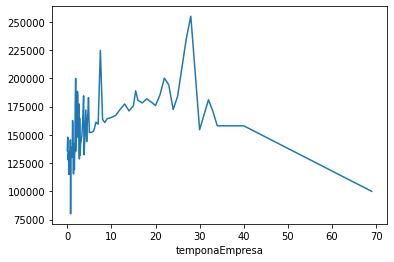

In [192]:
dg.plot()

Podemos verificar que profissionais com ate 10 anos de empresa, acabam tendo muita variação de salario principalmente ao ingressar na empresa, apos 10 anos temos uma "normalização" e um pico entre os 20 a 30 anos.

Isso se da muito provavelmente pela area em questão pois a area de tecnologia é uma area muito volatil onde trabalhadores acabam traocando de empresa de uma forma muito rapida

Filtro feito para pegarmos somente as linhas que foram realmente informadas pelo usario na coluna raca

In [193]:
dfiltrado_race = df_novo.loc[df_novo['raca'] != 'Não informado']
dfiltrado_race.head()

,compania,profissao,ganhoAnual,anosExperiencia,temponaEmpresa,salarioBase,SGV,bonus,genero,cityid,dmaid,raca,educacao,cidade,estado,pais
6921,FACEBOOK,Product Designer,310000,7.0,2.0,165000.0,120000.0,25000.0,Female,7300,807.0,White,Não informado,Menlo Park,CA,United States
8366,INTEL,Hardware Engineer,200000,14.0,3.0,163000.0,10000.0,27000.0,Female,7434,807.0,Asian,Não informado,Santa Clara,CA,United States
10937,COMCAST,Software Engineer,103000,2.0,1.0,96000.0,2000.0,5000.0,Male,10646,504.0,Black,Não informado,Philadelphia,PA,United States
11997,LATCH,Software Engineering Manager,170000,6.0,2.0,170000.0,0.0,0.0,Male,10182,501.0,Asian,Não informado,New York,NY,United States
14429,INTUIT,Software Engineer,134000,1.0,1.0,110000.0,13000.0,11000.0,Male,7322,807.0,Asian,Não informado,Mountain View,CA,United States


In [194]:
#Os dados de basesalary por raça tem 66% de dados faltantes
df_novo.groupby(["raca"])['salarioBase'].mean()

raca
Asian            129829.170914
Black            131549.275362
Hispanic         132629.760850
Não informado    146192.897166
Two Or More      137812.189055
White            139939.492032
Name: salarioBase, dtype: float64

Plotagem feita com todos os dados inclusive os dados NA, para verificarmos o comportamento da amostra

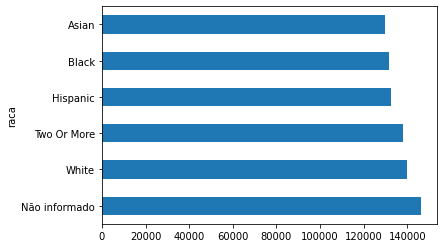

In [195]:
df_novo.groupby(["raca"])['salarioBase'].mean().sort_values(ascending = False).plot(kind = "barh")

In [196]:
dfiltrado_race.groupby(["raca"])['salarioBase'].mean()

raca
Asian          129829.170914
Black          131549.275362
Hispanic       132629.760850
Two Or More    137812.189055
White          139939.492032
Name: salarioBase, dtype: float64

Plotagem feita com todos os dados Filtrados, dessa forma temos uma ideia mais real das racas com os salariosBase.

 Porem os asiaticos acabam sendo um total de 11 mil dos respondentes, isso provavelmente acaba jogando a media para baixo

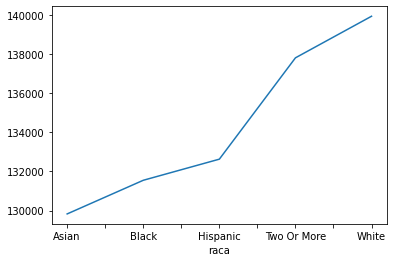

In [197]:
dfiltrado_race.groupby(["raca"])['salarioBase'].mean().plot()

Verificação das colunas Pais e salario Base

Podemos verificar que a uma variação muito grande entre os paises em questão

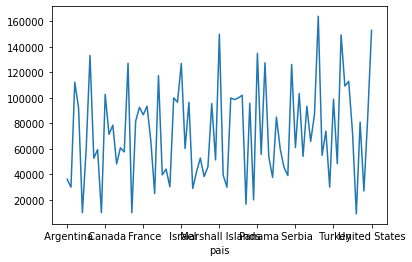

In [198]:
df_novo.groupby(["pais"])['salarioBase'].mean().plot()

Os top 10 paises com maiores salarios 

In [199]:
top_10_Pais = df_novo.groupby(["pais"])['salarioBase'].mean().sort_values(ascending = False).head(10)

Plotagem com o Kindh para verificarmos visualmente os 10 maiores paises em questão de salario

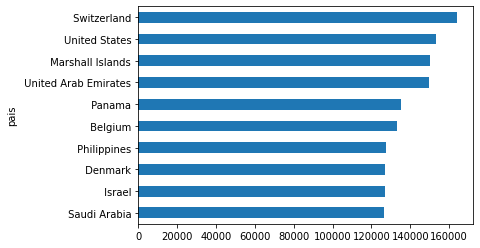

In [200]:
top_10_Pais.sort_values(ascending = True).plot(kind = "barh")

Tabela para verificarmos os salarios bases de todos os paises envolvidos nas pesquisa em questão

In [201]:
df_novo.groupby(["pais"])['salarioBase'].mean().sort_values(ascending = False)

pais
 Switzerland             164094.550747
United States            153011.695380
 Marshall Islands        150000.000000
 United Arab Emirates    149471.836936
 Panama                  135000.000000
 Belgium                 133333.333333
 Philippines             127615.510808
 Denmark                 127181.818182
 Israel                  127037.841731
 Saudi Arabia            126250.000000
 Hong Kong (SAR)         117451.612903
 United States           113000.000000
 Australia               112334.631949
 United Kingdom          109282.281691
 Singapore               103464.402027
 Canada                  102827.567018
 New Zealand             102111.111111
 Netherlands Antilles    100000.000000
 Morocco                 100000.000000
 Iraq                    100000.000000
 Turkey                   99025.851347
 Netherlands              98690.529455
 Ireland                  96677.807793
 Japan                    96577.324324
 Norway                   95871.836936
 Luxembourg         

Verificação da relação entre anos de experiencia e salario base 

In [202]:
df_novo.groupby(["anosExperiencia"])['salarioBase'].mean().sort_values(ascending = False).head(10)

anosExperiencia
5.5     335000.000000
38.0    225750.000000
39.0    217000.000000
11.5    210000.000000
10.5    210000.000000
32.0    209636.363636
27.0    207593.720720
21.0    198108.610782
29.0    196863.636364
23.0    196264.111070
Name: salarioBase, dtype: float64

Foi verificado que existe um pico muito ascentudo entre 0 e 10 anos se estabilizando logo a seguir, podemos chegar a conclusão que por conta da alta do profissional de tecnologia no mercado e com a possibilidade da home office alguns salarios subiram de forma ascentuada, ou são profissionais que são mais direcionados para linguagens mais utilizados no mercado

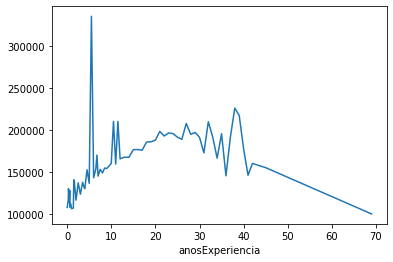

In [203]:
df_novo.groupby(["anosExperiencia"])['salarioBase'].mean().plot()

Verificacao de Salario Base em questão do genero, podemos verificar que dado a base em questão não temos uma diferença de salarios em questão de genero

In [204]:
df_novo.groupby(["genero"])['salarioBase'].mean()

genero
Female           136923.088788
Male             139458.877769
Não informado    147662.749632
Other            150090.041013
Name: salarioBase, dtype: float64

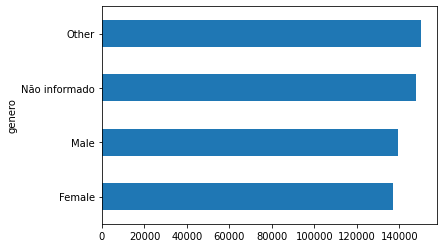

In [205]:
df_genero_plot = df_novo.groupby(["genero"])['salarioBase'].mean()

df_genero_plot.plot(kind = "barh")

Verificação de salario Base pela educação, devido a area de tecnologia nãos ser uma area tão rigida como outras, há a possibilidade de haver desenvolvedores sem graduação mais elevadas trabalhando na area, dessa forma verificamos se existe realmente uma variação de salario devido a educação conquistada.

In [206]:
df_novo.groupby(["educacao"])['salarioBase'].count().sort_values(ascending = False)

educacao
Não informado        32272
Master's Degree      15391
Bachelor's Degree    12601
PhD                   1703
Some College           355
Highschool             320
Name: salarioBase, dtype: int64

In [207]:
df_novo.groupby(["educacao"])['salarioBase'].mean().sort_values(ascending = False)

educacao
PhD                  173409.864944
Master's Degree      145753.042528
Não informado        145339.529064
Some College         141966.197183
Highschool           129378.125000
Bachelor's Degree    123958.495358
Name: salarioBase, dtype: float64

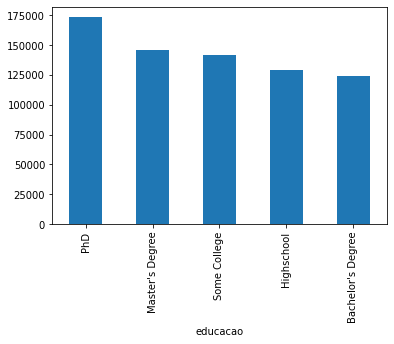

In [208]:
dfiltrado_educacao = df_novo.loc[df_novo['educacao'] != 'Não informado']

df_educacao_plot = dfiltrado_educacao.groupby(["educacao"])['salarioBase'].mean().sort_values(ascending = False)

df_educacao_plot.plot(kind = "bar")

Verificação de colunas Tempo na Empresa e ganhoAnual, verificamos se quanto mais tempo na empresa mais temos ganhos devido a experiencia

In [209]:
df_novo.groupby(["temponaEmpresa"])['ganhoAnual'].mean().sort_values(ascending = False).head(10)

temponaEmpresa
28.00    680000.000000
27.00    603800.000000
30.00    440000.000000
2.40     431000.000000
2.30     402000.000000
4.80     393000.000000
26.00    332833.333333
23.00    325950.000000
4.75     325000.000000
3.70     322500.000000
Name: ganhoAnual, dtype: float64

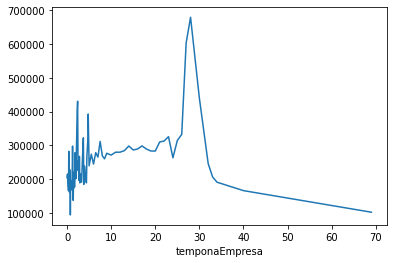

In [210]:
df_novo.groupby(["temponaEmpresa"])['ganhoAnual'].mean().plot()

Verificação de colunas Compania e ganhoAnual, verificamos se quais empresas tem os maiores salarios anuais medios.

In [211]:
df_filtrado_compania = df_novo.groupby(["compania"])['ganhoAnual'].mean().sort_values(ascending = False).head(10)

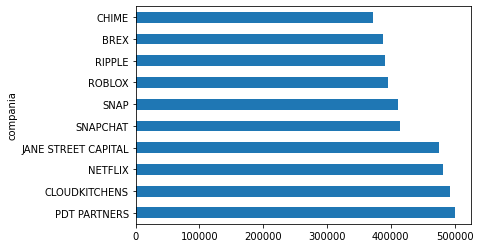

In [212]:
df_filtrado_compania.plot(kind = "barh")

Verificando as colunas genero por ganho atual, podemos ver claramente que as pessoas do genero feminino tem um menor ganho atual, sendo mais ou menos 5% comparado aos homens e comparado a outros é uma diferença de mais de 10%

In [213]:
df_novo.groupby(["genero"])['ganhoAnual'].mean().sort_values(ascending = False)

genero
Other            232347.500000
Não informado    230598.485236
Male             212446.977928
Female           195119.588513
Name: ganhoAnual, dtype: float64

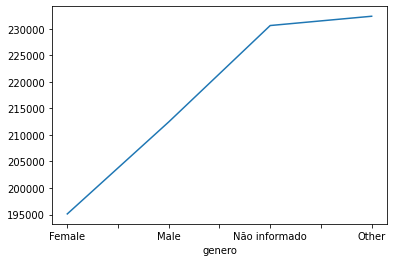

In [214]:
df_novo.groupby(["genero"])['ganhoAnual'].mean().plot()

Apesar de os Asiaticos estarem em ultimo lugar na verificação por salario base, na questão de salario Anual as cosias mudam onde as pessoas da colocaração negra acabam ficando em ultimo lugar

In [215]:
df_novo.groupby(["raca"])['ganhoAnual'].mean().sort_values(ascending = False)

raca
Não informado    226604.277160
White            206293.700199
Two Or More      204651.741294
Asian            193324.753653
Hispanic         189701.505757
Black            181324.637681
Name: ganhoAnual, dtype: float64

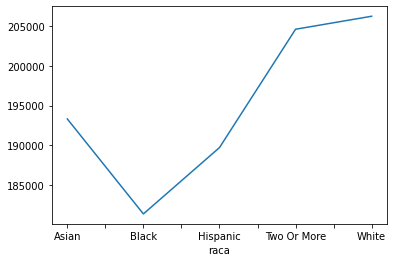

In [216]:
dfiltrado_race.groupby(["raca"])['ganhoAnual'].mean().plot()

Fizemos as verificação para chegarmos a uma conclusão quais eram os maiores graus de escolaridade se era homens, mulheres, outros.

In [217]:
# verificar a educação por gênero
Tabela_Cruzada = pd.crosstab(df_novo.genero, df_novo.educacao)


Tabela_Cruzada.rename(columns ={"Bachelor's Degree": "Bacharelado",
                          "Highschool": "Ensino médio",
                          "Master's Degree":"Mestrado",
                          "PhD":"Doutorado",
                          "Some College":"Outros",
                          },
                inplace=True )


Tabela_Cruzada.loc['Total']= Tabela_Cruzada.sum(numeric_only=True, axis=0,)

Tabela_Cruzada.loc[:,'Total'] = Tabela_Cruzada.sum(numeric_only=True, axis=1)

Tabela_Cruzada

educacao,Bacharelado,Ensino médio,Mestrado,Não informado,Doutorado,Outros,Total
genero,,,,,,,
Female,2186,13,2470,2089,200,41,6999
Male,9620,289,11236,13023,1229,305,35702
Não informado,726,10,1596,16937,265,7,19541
Other,69,8,89,223,9,2,400
Total,12601,320,15391,32272,1703,355,62642


In [218]:
df_novo['profissao'].value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: profissao, dtype: int64

In [219]:
dfiltrado_gender = df_novo.loc[df_novo['genero'] != 'Não informado']

Empresas que pagam mais valores de ações por funcionario

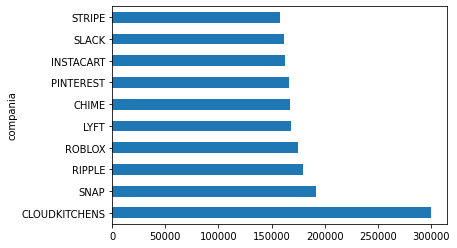

In [220]:
df_novo.groupby(["compania"])['SGV'].mean().sort_values(ascending = False).head(10).plot(kind = "barh")

Verificação de quais são as empresas com mais respondentes a pesquisa

In [221]:
dfiltrado_gender.groupby(["compania"])['genero'].count().sort_values(ascending = False).head(10)

compania
AMAZON        5565
MICROSOFT     3658
GOOGLE        2996
FACEBOOK      2124
APPLE         1392
ORACLE         811
INTEL          702
SALESFORCE     697
IBM            686
CISCO          655
Name: genero, dtype: int64

Verificação das companias que pagam os melhores salarios base em media

In [222]:
df_compania = df_novo.groupby(["compania"])['salarioBase'].mean().sort_values(ascending = False).head(10)

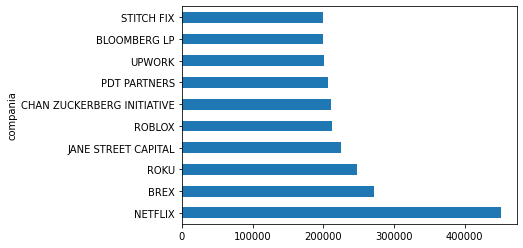

In [129]:
df_compania.plot(kind = 'barh')

Verificação dos salarios base por profissão, verificamos que apesar de possuirmos 41 mil engenheiro de softwares o mesmo ficou dentro da media

In [223]:
df_novo["profissao"].value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: profissao, dtype: int64

In [224]:
df_novo.groupby(["profissao"])['salarioBase'].mean().sort_values(ascending = False)

profissao
Software Engineering Manager    183167.158148
Technical Program Manager       156656.158659
Product Manager                 156639.762569
Solution Architect              146905.006937
Data Scientist                  143341.582737
Hardware Engineer               142536.167039
Product Designer                142117.538205
Marketing                       141349.514237
Software Engineer               137595.752516
Management Consultant           136195.696721
Human Resources                 128972.740533
Sales                           119677.462508
Mechanical Engineer             118738.933784
Recruiter                       118421.801912
Business Analyst                103976.534081
Name: salarioBase, dtype: float64

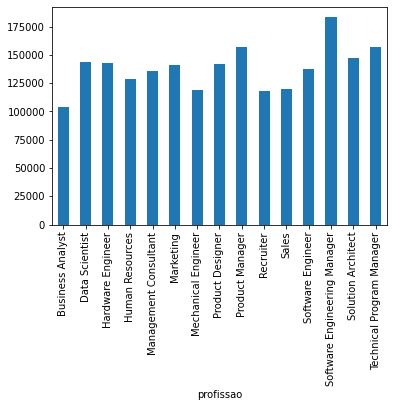

In [225]:
df_novo.groupby(["profissao"])['salarioBase'].mean().plot(kind = "bar")

verificamos para sermos mais precisos os anos de Experencia por salario base, tanto abaixo de 5 anos quanto acima de 10 anos.

In [226]:
df_anosExperiencia_5 = df_novo.where(df_novo['anosExperiencia'] <= 5.0).groupby(['anosExperiencia'])['salarioBase'].mean()

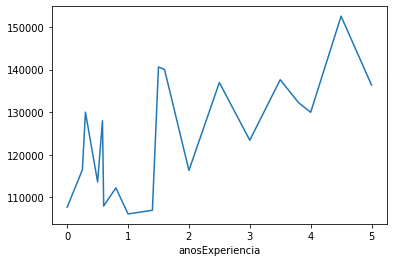

In [227]:
df_anosExperiencia_5.plot()

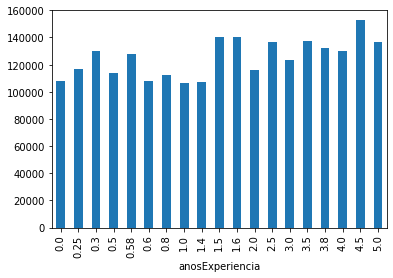

In [228]:
df_anosExperiencia_5.plot(kind = "bar")

In [229]:
df_novo.where(df_novo['anosExperiencia'] >= 10.0).groupby(['anosExperiencia'])['salarioBase'].mean().sort_values(ascending = False)

anosExperiencia
38.0    225750.000000
39.0    217000.000000
11.5    210000.000000
10.5    210000.000000
32.0    209636.363636
27.0    207593.720720
21.0    198108.610782
29.0    196863.636364
23.0    196264.111070
24.0    195459.570829
35.0    195374.422071
28.0    194624.587193
22.0    192607.120046
33.0    191333.333333
25.0    191258.116717
37.0    191215.510808
30.0    191134.795175
26.0    188693.799116
20.0    187697.489175
19.0    185718.312844
18.0    185468.318535
40.0    177416.666667
16.0    176475.620307
15.0    176453.769412
17.0    175767.138950
31.0    172571.428571
13.0    167447.723349
14.0    167321.142726
34.0    166250.000000
12.0    165476.295543
10.0    160130.180975
42.0    160000.000000
11.0    159189.443819
45.0    155000.000000
41.0    146000.000000
36.0    145333.333333
69.0    100000.000000
Name: salarioBase, dtype: float64

Por fim verificamos para sermos mais precisos os tempo na empresa com o  salario base, tanto abaixo de 1 anos quanto acima de 10 anos.

In [230]:
df_empresa_tempo = df_novo.where(df_novo['temponaEmpresa'] >= 10.0).groupby(['temponaEmpresa'])['salarioBase'].mean()

In [231]:
df_novo.where(df_novo['temponaEmpresa'] >= 10.0).groupby(['temponaEmpresa'])['salarioBase'].mean()

temponaEmpresa
10.0    165394.588487
11.0    167373.894474
12.0    172591.076360
13.0    177346.497377
14.0    171166.594266
15.0    175827.008379
15.5    189000.000000
16.0    180667.222145
17.0    178242.176927
18.0    181885.918468
19.0    179095.802906
20.0    175925.850466
21.0    185266.666667
22.0    200240.000000
23.0    194303.877702
24.0    172423.129503
25.0    184003.371915
26.0    209833.333333
27.0    235600.000000
28.0    255000.000000
30.0    154538.777021
32.0    181000.000000
33.0    171000.000000
34.0    158000.000000
40.0    158000.000000
69.0    100000.000000
Name: salarioBase, dtype: float64

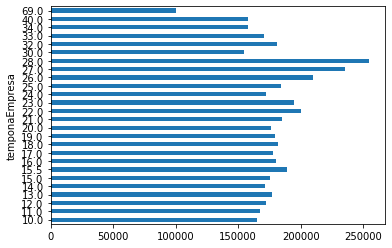

In [232]:
df_empresa_tempo.plot(kind = "barh")

In [233]:
df_novo.where(df_novo['temponaEmpresa'] <= 1.0).groupby(['temponaEmpresa'])['salarioBase'].mean()

temponaEmpresa
0.00    136084.055208
0.10    147928.571429
0.20    127900.000000
0.25    132669.539039
0.30    128348.844142
0.33    115000.000000
0.40    134538.777021
0.50    135362.574468
0.58    128000.000000
0.60    114923.076923
0.70    145500.000000
0.75     80000.000000
0.80    129072.789787
0.85    139077.554041
1.00    133513.844961
Name: salarioBase, dtype: float64

In [234]:
df_empresa_1 = df_novo.where(df_novo['temponaEmpresa'] <= 1.0).groupby(['temponaEmpresa'])['salarioBase'].mean()

Verificamos que há uma queda brusca nos dados que remetem a 0.75 anos de empresa, provavelmente devido a variaçãod e dados referente a localização, pode haver um ruido em questão de paises com crises economicas, onde preferese diminuir o salario a demissão.

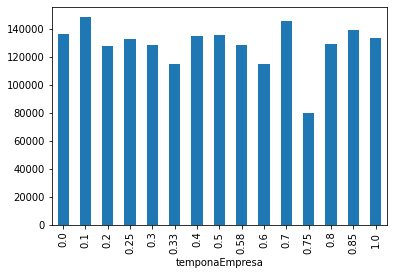

In [235]:
df_empresa_1.plot(kind = 'bar')